In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df=pd.read_csv("Crimes_-_2001_to_Present.csv")
print(df.shape)
df.head()

(8077151, 22)


ID Case Number                    Date                      Block  \
0   5741943    HN549294  08/25/2007 09:22:18 AM         074XX N ROGERS AVE   
1     25953    JE240540  05/24/2021 03:06:00 PM        020XX N LARAMIE AVE   
2     26038    JE279849  06/26/2021 09:24:00 AM      062XX N MC CORMICK RD   
3  13279676    JG507211  11/09/2023 07:30:00 AM           019XX W BYRON ST   
4  13274752    JG501049  11/12/2023 07:59:00 AM  086XX S COTTAGE GROVE AVE   

   IUCR Primary Type                                        Description  \
0  0560      ASSAULT                                             SIMPLE   
1  0110     HOMICIDE                                FIRST DEGREE MURDER   
2  0110     HOMICIDE                                FIRST DEGREE MURDER   
3  0620     BURGLARY                                     UNLAWFUL ENTRY   
4  0454      BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0                OTHER   False     False  ...  49.0             1.0       08A   
1               STREET    True     False  ...  36.0            19.0       01A   
2          PARKING LOT    True     False  ...  50.0            13.0       01A   
3            APARTMENT   False     False  ...  47.0             5.0        05   
4   SMALL RETAIL STORE    True     False  ...   6.0            44.0       08B   

   X Coordinate Y Coordinate  Year              Updated On   Latitude  \
0           NaN          NaN  2007  08/17/2015 03:03:40 PM        NaN   
1     1141387.0    1913179.0  2021  11/18/2023 03:39:49 PM  41.917838   
2     1152781.0    1941458.0  2021  11/18/2023 03:39:49 PM  41.995219   
3     1162518.0    1925906.0  2023  11/18/2023 03:39:49 PM  41.952345   
4     1183071.0    1847869.0  2023  12/09/2023 03:41:24 PM  41.737751   

   Longitude                       Location  
0        NaN                            NaN  
1 -87.755969  (41.917838056, -87.755968972)  
2 -87.713355  (41.995219444, -87.713354912)  
3 -87.677975  (41.952345086, -87.677975059)  
4 -87.604856  (41.737750767, -87.604855911)  

[5 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077151 entries, 0 to 8077150
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

# 3.EDA

In [4]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [5]:
num_cols=df.select_dtypes(include='number').columns
num_cols

Index(['ID', 'Beat', 'District', 'Ward', 'Community Area', 'X Coordinate',
       'Y Coordinate', 'Year', 'Latitude', 'Longitude'],
      dtype='object')

In [6]:
obj_cols=df.select_dtypes(exclude='number').columns
obj_cols

Index(['Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'FBI Code', 'Updated On',
       'Location'],
      dtype='object')

In [7]:
for col in num_cols:
    print(col, df[col].nunique())

ID 8077151
Beat 305
District 24
Ward 50
Community Area 78
X Coordinate 79152
Y Coordinate 130296
Year 24
Latitude 898056
Longitude 897459


In [8]:
for col in num_cols:
    print(col, df[col].isnull().sum())

ID 0
Beat 0
District 47
Ward 614846
Community Area 613470
X Coordinate 88958
Y Coordinate 88958
Year 0
Latitude 88958
Longitude 88958


In [9]:
df.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     13087
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614846
Community Area          613470
FBI Code                     0
X Coordinate             88958
Y Coordinate             88958
Year                         0
Updated On                   0
Latitude                 88958
Longitude                88958
Location                 88958
dtype: int64

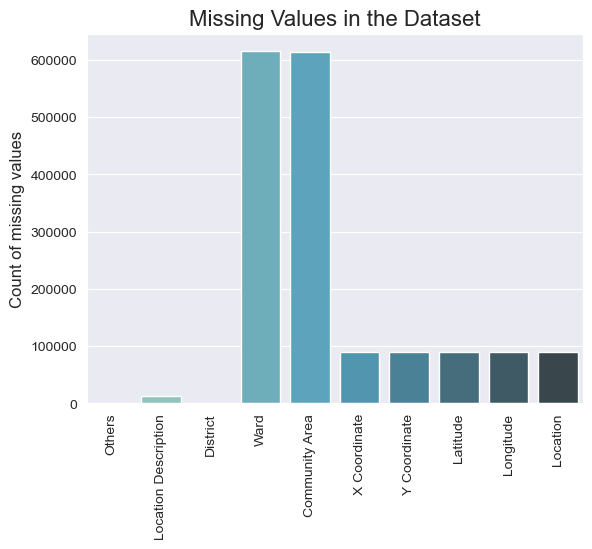

In [10]:
missing_values = list(df.isna().sum())
cols = list(df.columns)
col_final = []
for i in range(len(cols)):
    if (missing_values[i] == 0):
        cols[i]="Others"
d = dict(zip(cols, missing_values))
x = list(d.keys())
y = list(d.values())
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("Missing Values in the Dataset", fontdict = {'fontsize': 16})
plt.ylabel("Count of missing values", fontdict={'fontsize': 12})
plt.show()

**A Bit about the Missing values**

Inspecting the features, we see that all the features that have a large count of missing values are features that relate to the geographical location of the crime scene. This is No Surprise as the Chicago Crime Dataset is based on first hand accounts of people involved in or around the crime. It is not necessary that such first hand reports need to contain the specific locations of the crime.
Disclaimer: These crimes may be based upon preliminary information supplied to the Police Department by the reporting parties that have not been verified. The preliminary crime classifications may be changed at a later date based upon additional investigation and there is always the possibility of mechanical or human error.
Therefore, these missing values can be perfectly accounted for.

We have more number of missing values in the whole dataset that are present in Location Description, Ward, Community Area, X Co-ordinate, Y Co-ordinate, Latitude, Longitude and Location.
Since, these features are not direct numeric values, we can't use summary statistical functions to fill in the missing values.
Hence, we shall be removing these values from the dataset

In [11]:
df=df.drop(columns= ['Case Number', 'Block', 'IUCR', 'X Coordinate', 'Y Coordinate','Year', 'Updated On', 'FBI Code'], axis = 1)

In [12]:
print("Shape of Original Dataset", df.shape)
df=df.dropna()
print('After removing null values shape of the dataset', df.shape)

Shape of Original Dataset (8077151, 14)
After removing null values shape of the dataset (7373082, 14)


In [13]:
# How much of the data has been retained after this removal ?
print(round(7373082 / 8077151 * 100,2), "percentage of the data has been retained.")

91.28 percentage of the data has been retained.


Dropping the rows will usually result in clean datasets and produce well-behaved data. But often, it removes a lot of information that reduces result accuracy.
However, in our case, since **91.28%** of the data is retained and since there is practically no other way to work around the type of missing values we have, we shall go ahead with this slightly diminished dataset

In [14]:
df['Date']=pd.to_datetime(df['Date'])
df.tail()

ID                Date         Primary Type  \
8077146  13047495 2023-04-18 08:00:00   DECEPTIVE PRACTICE   
8077147  13168300 2023-08-07 18:00:00              ROBBERY   
8077148  13114024 2023-06-20 19:00:00  MOTOR VEHICLE THEFT   
8077149  13188860 2023-08-26 00:00:00      CRIMINAL DAMAGE   
8077150  13126372 2023-07-01 19:29:00      CRIMINAL DAMAGE   

                                     Description Location Description  Arrest  \
8077146  FINANCIAL IDENTITY THEFT $300 AND UNDER            APARTMENT   False   
8077147                          ARMED - HANDGUN             SIDEWALK   False   
8077148                               AUTOMOBILE               STREET   False   
8077149                               TO VEHICLE               STREET   False   
8077150                               TO VEHICLE               STREET   False   

         Domestic  Beat  District  Ward  Community Area   Latitude  Longitude  \
8077146     False  1214      12.0  42.0            28.0  41.887589 -87.642827   
8077147     False   634       6.0   9.0            49.0  41.721698 -87.625345   
8077148     False  1031      10.0  22.0            30.0  41.836324 -87.720674   
8077149     False   421       4.0   7.0            46.0  41.752631 -87.548737   
8077150      True   123       1.0  34.0            32.0  41.875155 -87.633649   

                              Location  
8077146  (41.887589411, -87.642826595)  
8077147   (41.72169837, -87.625345212)  
8077148  (41.836323827, -87.720674149)  
8077149  (41.752631346, -87.548737069)  
8077150   (41.87515458, -87.633648765)

## 3.1 Temporal Analysis 

### 3.1.1 Crime Trends Over Time

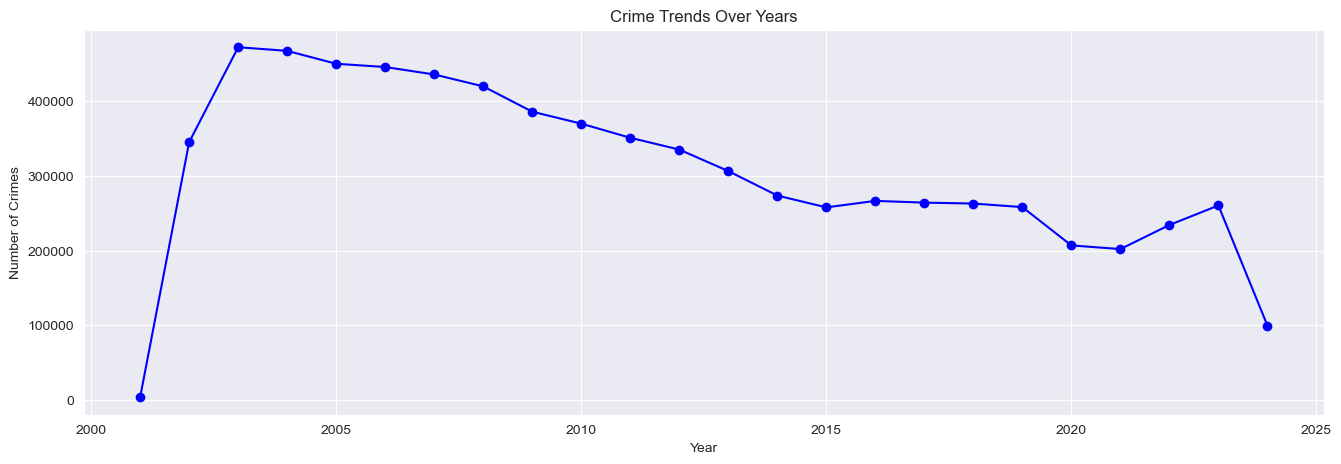

In [15]:
crime_count_year=df.groupby(df['Date'].dt.year)['ID'].count()
plt.figure(figsize=(16,5))
plt.plot(crime_count_year.index, crime_count_year.values, marker='o', linestyle='-', color='b')
plt.title('Crime Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()           

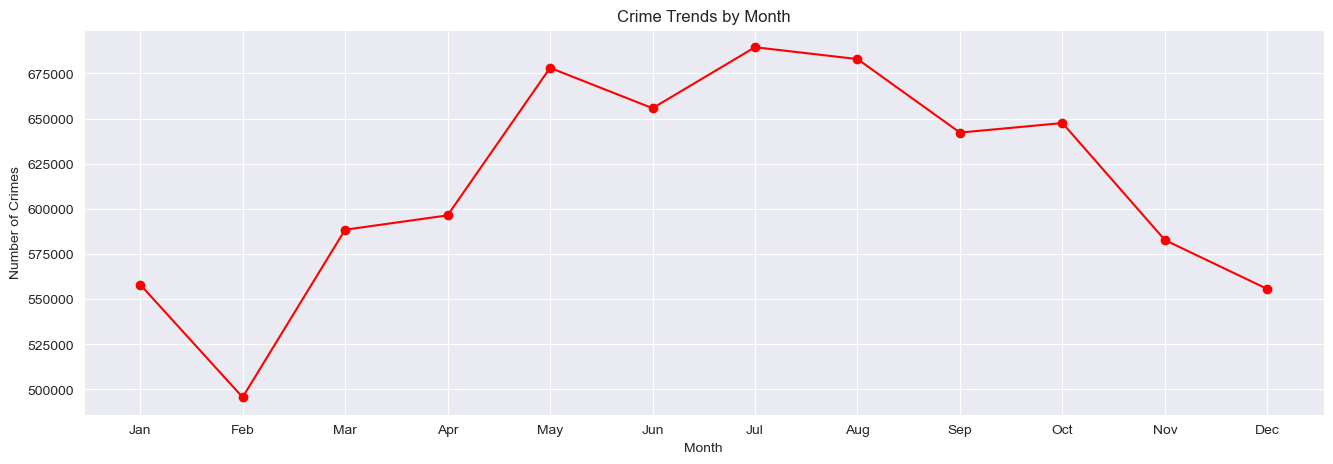

In [16]:
crime_count_month=df.groupby(df['Date'].dt.month)['ID'].count()
plt.figure(figsize=(16,5))
plt.plot(crime_count_month.index, crime_count_month.values, marker='o', linestyle='-', color='r')
plt.title('Crime Trends by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show() 

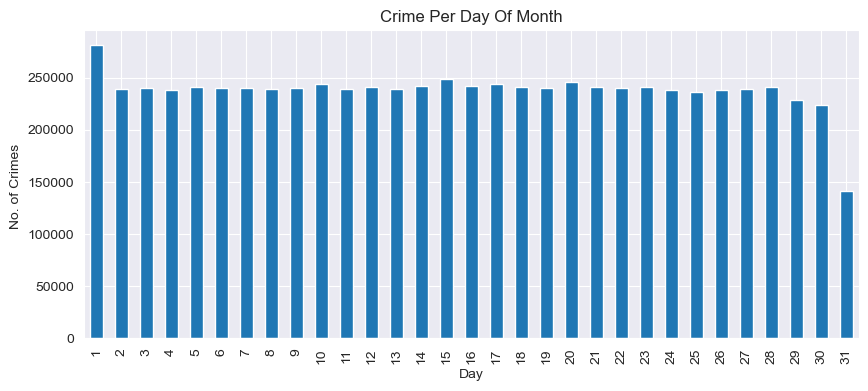

In [17]:
plt.figure(figsize = (10,4))
df.groupby([df['Date'].dt.day]).size().plot.bar()
plt.title('Crime Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('No. of Crimes ')
plt.show()

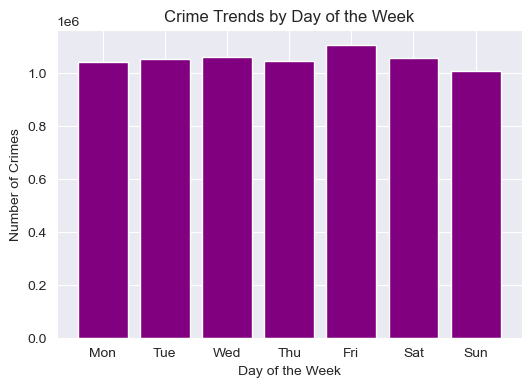

In [18]:
crime_count_dayofweek = df.groupby(df['Date'].dt.dayofweek)['ID'].count()
plt.figure(figsize=(6, 4))
plt.bar(crime_count_dayofweek.index, crime_count_dayofweek.values, color='purple')
plt.title('Crime Trends by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

### 3.1.2 Peak Crime Hours

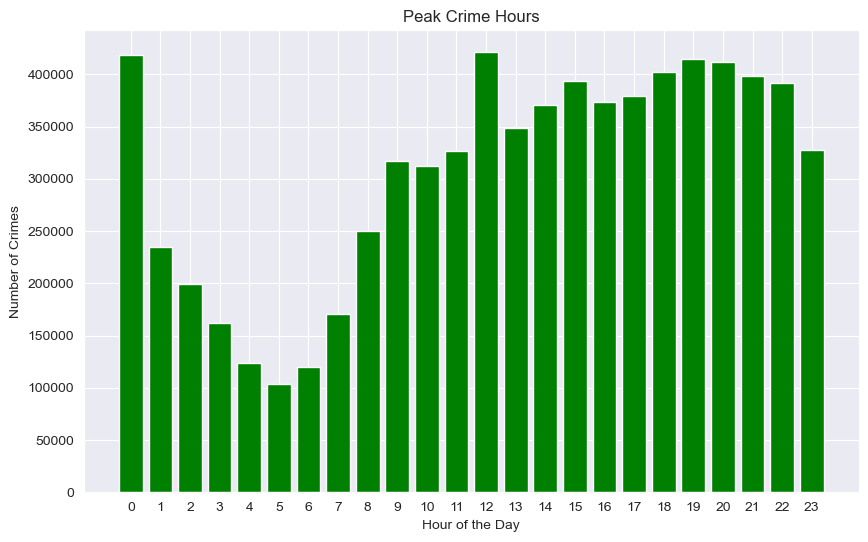

In [19]:
crime_count_hour = df.groupby(df['Date'].dt.hour)['ID'].count()
plt.figure(figsize=(10, 6))
plt.bar(crime_count_hour.index, crime_count_hour.values, color='g')
plt.title('Peak Crime Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.xticks(range(24))
plt.show()

#### Heatmaps for Day and Month Comparison

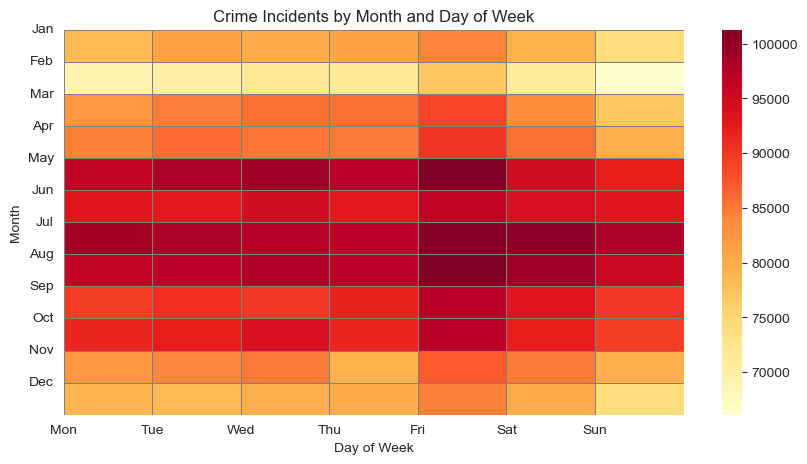

In [20]:
df_new=df.copy()
df_new['Month'] = df_new['Date'].dt.month
df_new['DayOfWeek'] = df_new['Date'].dt.dayofweek

crime_heatmap_month_day = df_new.groupby(['Month', 'DayOfWeek']).size().unstack()
plt.figure(figsize=(10, 5))
sns.heatmap(crime_heatmap_month_day, cmap='YlOrRd', linewidths=0.5, linecolor='gray')
plt.title('Crime Incidents by Month and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.yticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

## 3.2 Geospatial Analysis

### 3.2.1 Crime Hotspots

In [21]:
latitude = df['Latitude'].iloc[0]
longitude = df['Longitude'].iloc[0]

Chicago_Map = folium.Map(location=[latitude, longitude], 
                         zoom_start=11,
                         tiles="CartoDB dark_matter")
Chicago_Map.save('chicago_map.html')
Chicago_Map

In [22]:
local_locations = df.groupby('Community Area').first()
print(local_locations.shape)
local_locations.head()

(78, 13)


ID                Date         Primary Type  \
Community Area                                                      
0.0              1975343 2002-02-04 19:30:00  MOTOR VEHICLE THEFT   
1.0             13208213 2023-07-24 09:00:00   DECEPTIVE PRACTICE   
2.0             13202202 2023-09-06 18:22:00        OTHER OFFENSE   
3.0             13273264 2023-11-10 19:54:00              BATTERY   
4.0             13201925 2023-09-06 18:00:00  MOTOR VEHICLE THEFT   

                                            Description Location Description  \
Community Area                                                                 
0.0                                          AUTOMOBILE               STREET   
1.0                                             FORGERY            RESIDENCE   
2.0                                    TELEPHONE THREAT               STREET   
3.0             AGGRAVATED - KNIFE / CUTTING INSTRUMENT            APARTMENT   
4.0                                          AUTOMOBILE            APARTMENT   

                Arrest  Domestic  Beat  District  Ward   Latitude  Longitude  \
Community Area                                                                 
0.0              False     False   124       1.0  42.0  41.881537 -87.616595   
1.0              False     False  2423      24.0  49.0  42.013788 -87.673183   
2.0              False      True  2413      24.0  50.0  41.995367 -87.684902   
3.0              False     False  2024      20.0  48.0  41.973339 -87.653132   
4.0              False     False  2032      20.0  40.0  41.973922 -87.679343   

                                     Location  
Community Area                                 
0.0             (41.881536805, -87.616595359)  
1.0             (42.013787643, -87.673182834)  
2.0             (41.995366855, -87.684902319)  
3.0             (41.973339203, -87.653132052)  
4.0              (41.973922349, -87.67934257)

In [23]:
new_locations = local_locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]
new_locations.head()

Latitude  Longitude Location Description  Arrest
Community Area                                                   
0.0             41.881537 -87.616595               STREET   False
1.0             42.013788 -87.673183            RESIDENCE   False
2.0             41.995367 -87.684902               STREET   False
3.0             41.973339 -87.653132            APARTMENT   False
4.0             41.973922 -87.679343            APARTMENT   False

In [24]:
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(Chicago_Map)

In [25]:
unique_locations=df['Location'].value_counts()
unique_locations.index

Index(['(41.976290414, -87.905227221)', '(41.754592961, -87.741528537)',
       '(41.883500187, -87.627876698)', '(41.897895128, -87.624096605)',
       '(41.909664252, -87.742728815)', '(41.788987036, -87.74147999)',
       '(41.896888586, -87.628203192)', '(41.885487535, -87.726422045)',
       '(41.868180939, -87.709271389)', '(41.868541914, -87.639235361)',
       ...
       '(41.911116381, -87.638384878)', '(41.942606052, -87.659049506)',
       '(41.750490307, -87.654214527)', '(41.996548127, -87.698384093)',
       '(41.706206616, -87.627119233)', '(41.809153255, -87.591796288)',
       '(41.922442712, -87.691825424)', '(41.824497727, -87.700240984)',
       '(41.895705993, -87.626445824)', '(41.87515458, -87.633648765)'],
      dtype='object', length=681421)

In [26]:
CR_index = pd.DataFrame({"Raw_Location" : unique_locations.index, "ValueCount":unique_locations})
CR_index.index = range(len(unique_locations))
CR_index.head()

Raw_Location  ValueCount
0  (41.976290414, -87.905227221)       14009
1  (41.754592961, -87.741528537)       10306
2  (41.883500187, -87.627876698)        8765
3  (41.897895128, -87.624096605)        4836
4  (41.909664252, -87.742728815)        3582

In [27]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)
CR_index['LocationCoord'] = CR_index['Raw_Location'].apply(Location_extractor)
CR_index  = CR_index.drop(columns=['Raw_Location'], axis = 1)

In [28]:
%%time

chicago_map_crime = folium.Map(location=[latitude, longitude],
                        zoom_start=5,
                        tiles="CartoDB dark_matter")

for i in range(500):
    lat = CR_index['LocationCoord'].iloc[i][0]
    long = CR_index['LocationCoord'].iloc[i][1]
    radius = CR_index['ValueCount'].iloc[i] / 45
    
    if CR_index['ValueCount'].iloc[i] > 2000:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               CR_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_map_crime)

CPU times: total: 62.5 ms
Wall time: 177 ms


#### Heatmap for Crime Hotspots

In [29]:
chicago_map_crime

### 3.2.2 District/Ward Analysis

#### Crime Rates by District

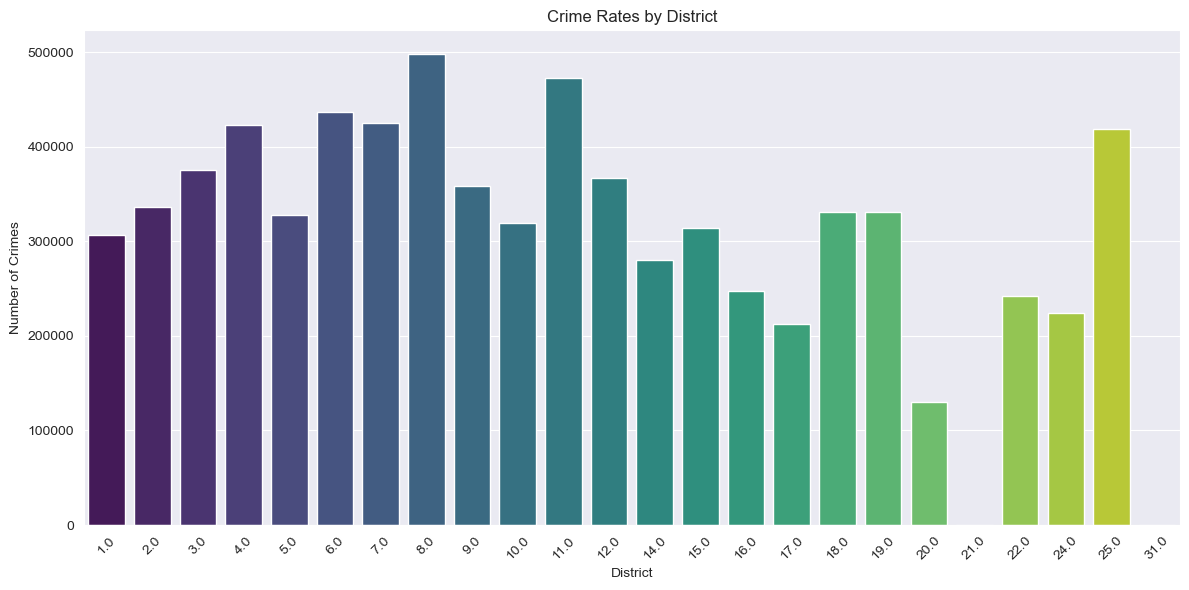

In [30]:
crime_by_district = df.groupby('District')['ID'].count().reset_index(name='Crime Count')
plt.figure(figsize=(12, 6))
sns.barplot(x='District', y='Crime Count', data=crime_by_district, palette='viridis')
plt.title('Crime Rates by District')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Crime Rates by Ward

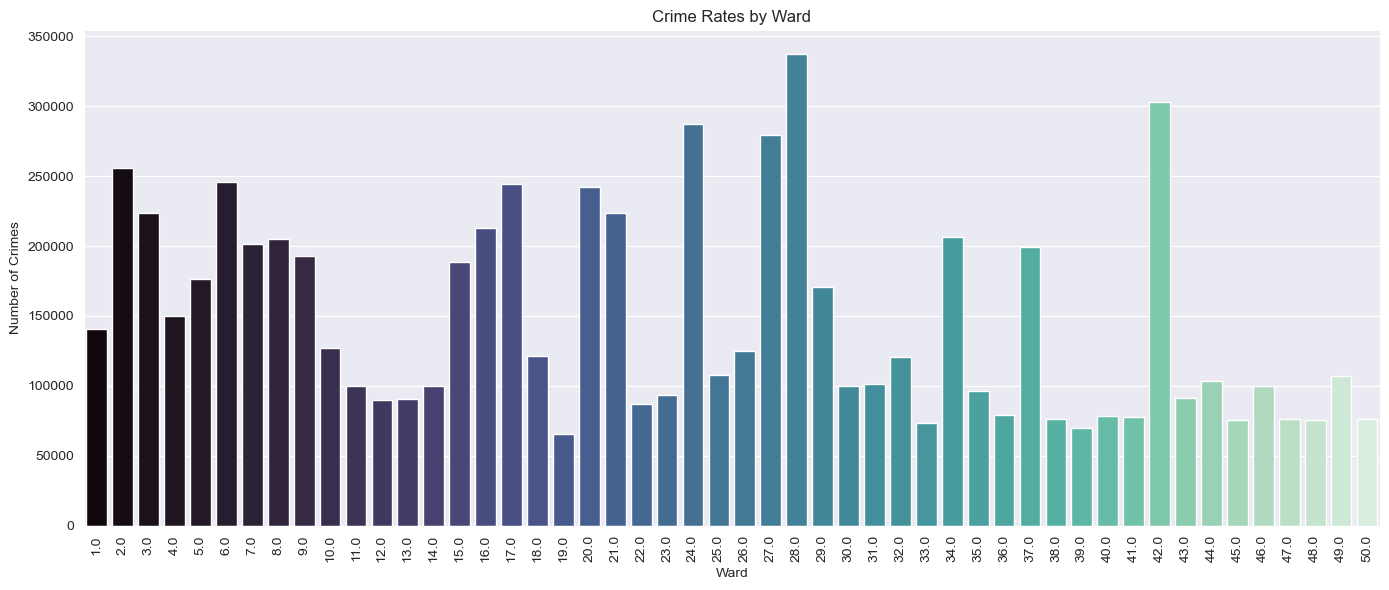

In [31]:
crime_by_ward = df.groupby('Ward')['ID'].count().reset_index(name='Crime Count')
plt.figure(figsize=(14, 6))
sns.barplot(x='Ward', y='Crime Count', data=crime_by_ward, palette='mako')
plt.title('Crime Rates by Ward')
plt.xlabel('Ward')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 3.3 Crime Type Analysis

### 3.3.1 Distribution of Crime Types

Analyze Frequency of 'Primary Type'

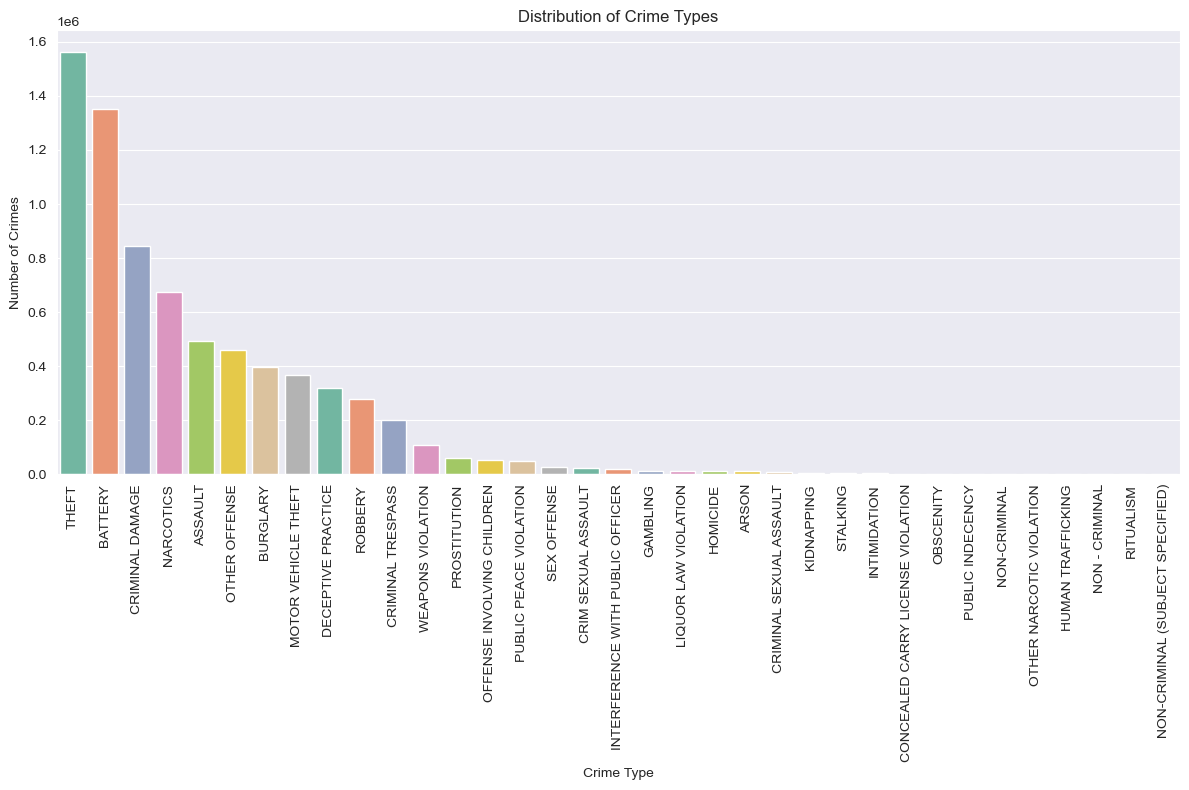

In [32]:
crime_type_counts = df['Primary Type'].value_counts()

# Plotting the distribution of crime types
plt.figure(figsize=(12, 8))
sns.barplot(x=crime_type_counts.index, y=crime_type_counts.values, palette='Set2')
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

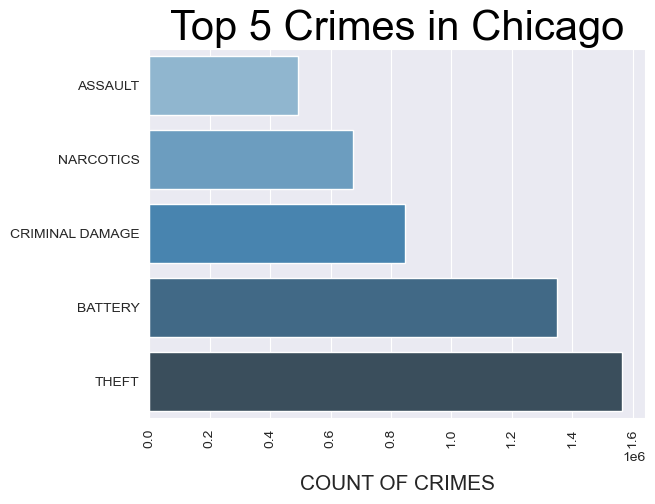

In [33]:
top_5_crimes = df['Primary Type'].value_counts().sort_values(ascending=False).head()

temp = df.groupby('Primary Type', as_index=False).agg({"ID": "count"})
temp = temp.sort_values(by=['ID'], ascending=False).head()
temp = temp.sort_values(by='ID', ascending=True)
sns.barplot(x='ID', y='Primary Type', data=temp, palette="Blues_d")

plt.title("Top 5 Crimes in Chicago", fontdict = {'fontsize': 30, 'fontname':'Arial', 'color': '#000000'})
plt.xlabel("\nCOUNT OF CRIMES", fontdict = {'fontsize': 15})
plt.ylabel("")
plt.xticks(rotation=90)
plt.show()

In [34]:
temp.head()
temp.columns=['Crime','Number']
temp.index=[0,1,2,3,4]
temp['co-ordinates']=[1,2,3,4,5]
temp.head()

Crime   Number  co-ordinates
0          ASSAULT   491573             1
1        NARCOTICS   675155             2
2  CRIMINAL DAMAGE   844861             3
3          BATTERY  1350191             4
4            THEFT  1563982             5

**Most occurring Top 5 Crimes in Chicago**

* Theft
* Battery
* Criminal Damage
* Narcotics
* Assault

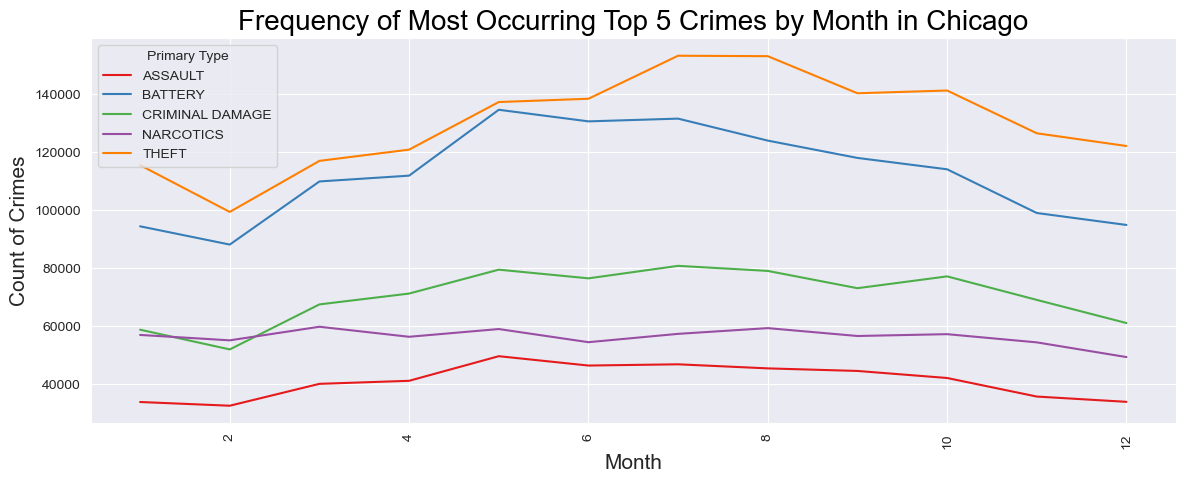

In [35]:
top_5_crimes = df['Primary Type'].value_counts().head(5).index
df_top_5 = df[df['Primary Type'].isin(top_5_crimes)].copy()
df_top_5.loc[:, 'Month'] = pd.to_datetime(df_top_5['Date']).dt.month
crime_by_month = df_top_5.groupby(['Month', 'Primary Type']).size().reset_index(name='Count')

plt.figure(figsize=(14, 5))
sns.lineplot(x='Month', y='Count', hue='Primary Type', data=crime_by_month, palette='Set1')

plt.title("Frequency of Most Occurring Top 5 Crimes by Month in Chicago", fontdict={'fontsize': 20, 'fontname':'Arial', 'color': '#000000'})
plt.xlabel("Month", fontdict={'fontsize': 15})
plt.ylabel("Count of Crimes", fontdict={'fontsize': 15})
plt.xticks(rotation=90)
plt.legend(title='Primary Type')
plt.show()

Analyze Frequency of 'Description'

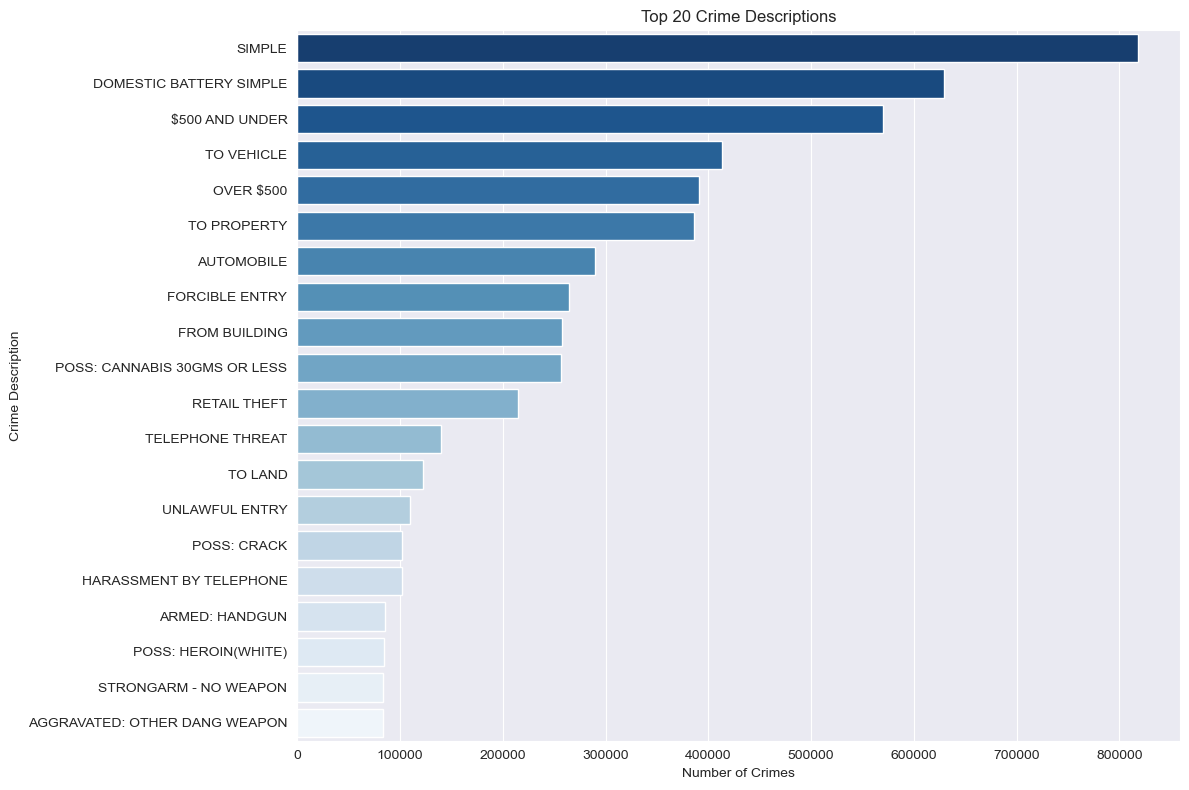

In [36]:
crime_desc_counts = df['Description'].value_counts().nlargest(20)  # Display top 20 descriptions for better visualization

# Plotting the distribution of crime descriptions
plt.figure(figsize=(12, 8))
sns.barplot(x=crime_desc_counts.values, y=crime_desc_counts.index, palette='Blues_r')
plt.title('Top 20 Crime Descriptions')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Description')
plt.tight_layout()
plt.show()

In [37]:
df['Location Description'].value_counts()[:10]

STREET                            1908322
RESIDENCE                         1200312
APARTMENT                          886344
SIDEWALK                           702071
OTHER                              239163
PARKING LOT/GARAGE(NON.RESID.)     181724
ALLEY                              165246
SMALL RETAIL STORE                 145628
SCHOOL, PUBLIC, BUILDING           131368
RESTAURANT                         123853
Name: Location Description, dtype: int64

In [39]:
arrestcount_by_year=df.groupby(df['Date'].dt.year)['Arrest'].value_counts().rename('Count').to_frame()
arrestcount_by_year['Arrest_Percentage'] = arrestcount_by_year['Count'] * 100 / arrestcount_by_year.groupby(level=0)['Count'].transform('sum')
arrestcount_by_year.reset_index(inplace=True)
arrestcount_by_year.head()

Date  Arrest   Count  Arrest_Percentage
0  2001   False    3173          81.421606
1  2001    True     724          18.578394
2  2002   False  248853          72.125660
3  2002    True   96174          27.874340
4  2003   False  331542          70.242693

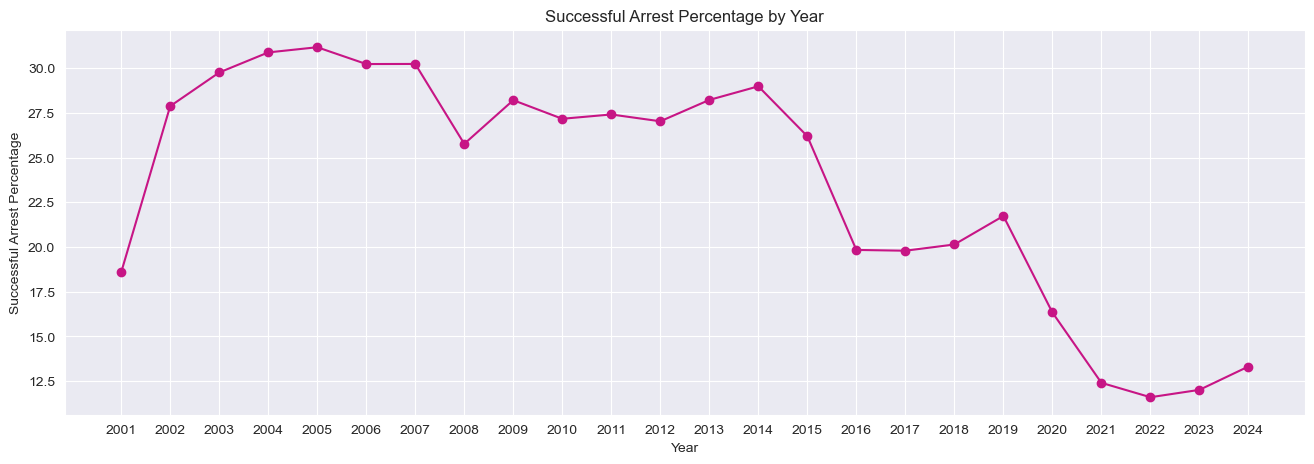

In [40]:
line_plot = arrestcount_by_year[arrestcount_by_year['Arrest'] == True].set_index('Date')
plt.figure(figsize=(16, 5))
plt.plot(line_plot.index, line_plot['Arrest_Percentage'], marker='o', color='mediumvioletred')
plt.title("Successful Arrest Percentage by Year")
plt.xlabel("Year")
plt.ylabel("Successful Arrest Percentage")
plt.xticks(line_plot.index, line_plot.index.values)
plt.grid(True)
plt.show()

In [41]:
def plot_counts(serie, title):
    df = pd.DataFrame(serie.value_counts()[:15])
    df.columns = ["Freq"]
    df["Type"] = df.index
    fig = px.bar(df, y="Freq", x="Type", text="Freq", color="Freq", color_continuous_scale=px.colors.sequential.OrRd)
    fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
    fig.update_layout(title_text=title)
    fig.show()

plot_counts(df["Primary Type"], "Kind of crimes")

In [42]:
plot_counts(df["Location Description"], "Location Of Crimes")

In [43]:
plot_counts(df["Description"], "Description Of Crimes")

In [44]:
aux = df.groupby('Primary Type')['Arrest'].mean().reset_index()
aux['Arrest (%)'] = aux['Arrest'].round(4)*100
aux.sort_values('Arrest', inplace=True)
fig = px.bar(
    aux,
    orientation='h',
    x="Arrest (%)",
    y="Primary Type",
    color="Arrest (%)",
    text="Arrest (%)",
    height=800,
    width=1200,
    color_continuous_scale=px.colors.sequential.OrRd

)
fig.update_traces(texttemplate="%{text:.4s}", textposition="outside")
fig.update_layout(title_text="Arrested Rate in % per Type Crime in Chicago.")

fig.show()

In [45]:
print(df.shape)
types_to_drop = [
    'NON-CRIMINAL (SUBJECT SPECIFIED)', 
    'BATTERY',
    'NON - CRIMINAL', 
    'LIQUOR LAW VIOLATION', 
    'PUBLIC INDECENCY', 
    'CONCEALED CARRY LICENSE VIOLATION', 
    'NON-CRIMINAL', 
]
df_new=df.copy()
df_new= df_new[~df_new['Primary Type'].isin(types_to_drop)]
print(df_new.shape)
df_new.head()

(7373082, 14)
(6008198, 14)


ID                Date        Primary Type  \
1     25953 2021-05-24 15:06:00            HOMICIDE   
2     26038 2021-06-26 09:24:00            HOMICIDE   
3  13279676 2023-11-09 07:30:00            BURGLARY   
6  13203321 2023-09-06 17:00:00     CRIMINAL DAMAGE   
7  13210088 2023-08-31 12:00:00  DECEPTIVE PRACTICE   

                           Description  \
1                  FIRST DEGREE MURDER   
2                  FIRST DEGREE MURDER   
3                       UNLAWFUL ENTRY   
6                           TO VEHICLE   
7  FINANCIAL IDENTITY THEFT OVER $ 300   

                     Location Description  Arrest  Domestic  Beat  District  \
1                                  STREET    True     False  2515      25.0   
2                             PARKING LOT    True     False  1711      17.0   
3                               APARTMENT   False     False  1922      19.0   
6  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False   122       1.0   
7                                  STREET   False     False  1225      12.0   

   Ward  Community Area   Latitude  Longitude                       Location  
1  36.0            19.0  41.917838 -87.755969  (41.917838056, -87.755968972)  
2  50.0            13.0  41.995219 -87.713355  (41.995219444, -87.713354912)  
3  47.0             5.0  41.952345 -87.677975  (41.952345086, -87.677975059)  
6  42.0            32.0  41.886018 -87.633938  (41.886018055, -87.633937881)  
7  27.0            28.0  41.877565 -87.684791   (41.877565108, -87.68479102)

In [46]:
def combinePrimaryType(df):
    mapping = {
        'OTHER NARCOTIC VIOLATION': 'NARCOTICS',
        'PROSTITUTION': 'SEX OFFENSE',
        'CRIM SEXUAL ASSAULT': 'SEX OFFENSE',
        'RITUALISM': 'OTHER OFFENSE',
        'GAMBLING': 'OTHER OFFENSE',
        'CRIMINAL TRESPASS': 'ROBBERY or TRESPASS',
        'ROBBERY': 'ROBBERY or TRESPASS',
        'INTERFERENCE WITH PUBLIC OFFICER': 'PUBLIC PEACE VIOLATION',
        'INTIMIDATION': 'INTIMIDATION or STALKING',
        'STALKING': 'INTIMIDATION or STALKING'
    }
    df['Primary Type']=df['Primary Type'].replace(mapping)
    return df        
df1=combinePrimaryType(df_new)
print(df1.shape)
df1.head()

(6008198, 14)


ID                Date        Primary Type  \
1     25953 2021-05-24 15:06:00            HOMICIDE   
2     26038 2021-06-26 09:24:00            HOMICIDE   
3  13279676 2023-11-09 07:30:00            BURGLARY   
6  13203321 2023-09-06 17:00:00     CRIMINAL DAMAGE   
7  13210088 2023-08-31 12:00:00  DECEPTIVE PRACTICE   

                           Description  \
1                  FIRST DEGREE MURDER   
2                  FIRST DEGREE MURDER   
3                       UNLAWFUL ENTRY   
6                           TO VEHICLE   
7  FINANCIAL IDENTITY THEFT OVER $ 300   

                     Location Description  Arrest  Domestic  Beat  District  \
1                                  STREET    True     False  2515      25.0   
2                             PARKING LOT    True     False  1711      17.0   
3                               APARTMENT   False     False  1922      19.0   
6  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False   122       1.0   
7                                  STREET   False     False  1225      12.0   

   Ward  Community Area   Latitude  Longitude                       Location  
1  36.0            19.0  41.917838 -87.755969  (41.917838056, -87.755968972)  
2  50.0            13.0  41.995219 -87.713355  (41.995219444, -87.713354912)  
3  47.0             5.0  41.952345 -87.677975  (41.952345086, -87.677975059)  
6  42.0            32.0  41.886018 -87.633938  (41.886018055, -87.633937881)  
7  27.0            28.0  41.877565 -87.684791   (41.877565108, -87.68479102)

In [47]:
print(df1['Primary Type'].nunique())
df1['Primary Type'].unique()

20


array(['HOMICIDE', 'BURGLARY', 'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE',
       'CRIMINAL SEXUAL ASSAULT', 'THEFT', 'OFFENSE INVOLVING CHILDREN',
       'MOTOR VEHICLE THEFT', 'ROBBERY or TRESPASS', 'ASSAULT',
       'SEX OFFENSE', 'OTHER OFFENSE', 'WEAPONS VIOLATION',
       'INTIMIDATION or STALKING', 'ARSON', 'NARCOTICS', 'KIDNAPPING',
       'PUBLIC PEACE VIOLATION', 'OBSCENITY', 'HUMAN TRAFFICKING'],
      dtype=object)

<Axes: xlabel='count', ylabel='Description'>

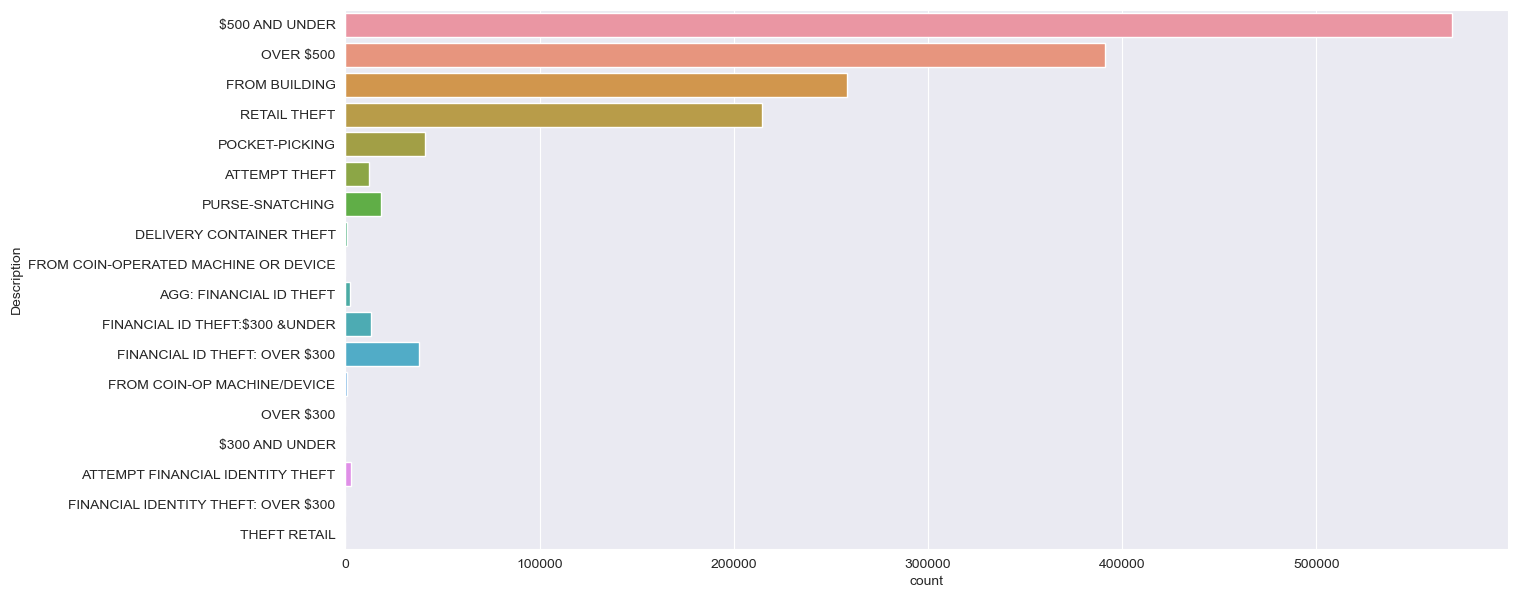

In [48]:
df_theft = df1[df1['Primary Type'] == 'THEFT']
plt.figure(figsize = (15, 7))
sns.countplot(y = df_theft['Description'])

In [49]:
df_theft_data = pd.DataFrame({"Counts": df_theft['Description'].value_counts(), "Description" : df_theft['Description'].value_counts().index})
df_theft_data.reset_index(inplace=True)
df_theft_data = df_theft_data.drop(columns=['index'], axis = 1)
df_theft_data.head()

Counts     Description
0  570039  $500 AND UNDER
1  391096       OVER $500
2  258073   FROM BUILDING
3  214663    RETAIL THEFT
4   40814  POCKET-PICKING

<Axes: xlabel='Counts', ylabel='Description'>

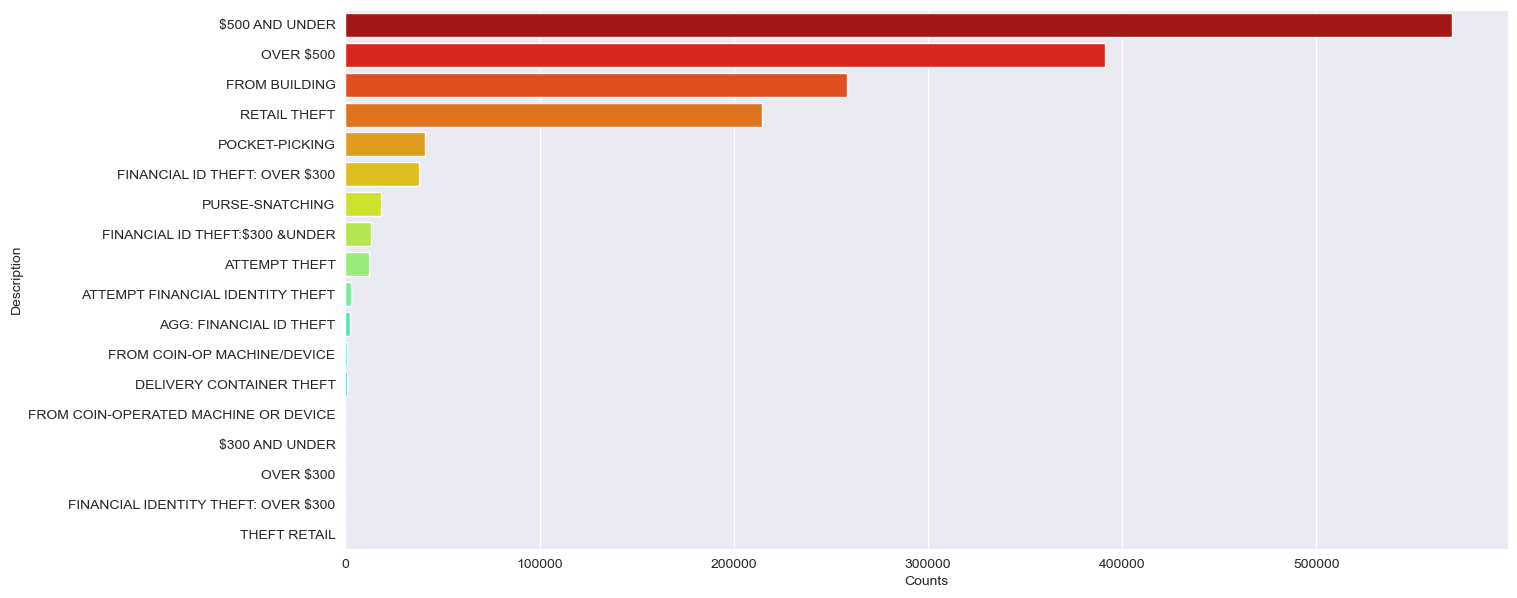

In [50]:
plt.figure(figsize = (15, 7))
sns.barplot(y ="Description", x = "Counts", data = df_theft_data, palette="jet_r")

### 3.3.2 Severity Analysis (Investigation of the distribution of severe crimes)

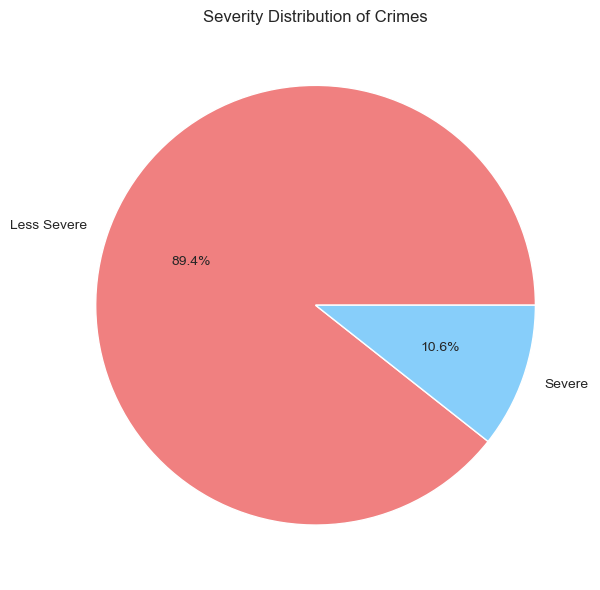

In [51]:
def categorize_severity(crime_type):
    if crime_type in ['HOMICIDE', 'ASSAULT', 'ROBBERY']:
        return 'Severe'
    else:
        return 'Less Severe'
df['Severity'] = df['Primary Type'].apply(categorize_severity)
severity_counts = df['Severity'].value_counts()
plt.figure(figsize=(8, 6))
severity_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Severity Distribution of Crimes')
plt.ylabel('')
plt.tight_layout()
plt.show()

## 3.4 Arrest and Domestic Incident Analysis

### 3.4.1 Arrest Rates

In [52]:
overall_arrest_rate = df['Arrest'].mean() * 100  
print(f"Overall Arrest Rate: {overall_arrest_rate:.2f}%")

Overall Arrest Rate: 25.37%


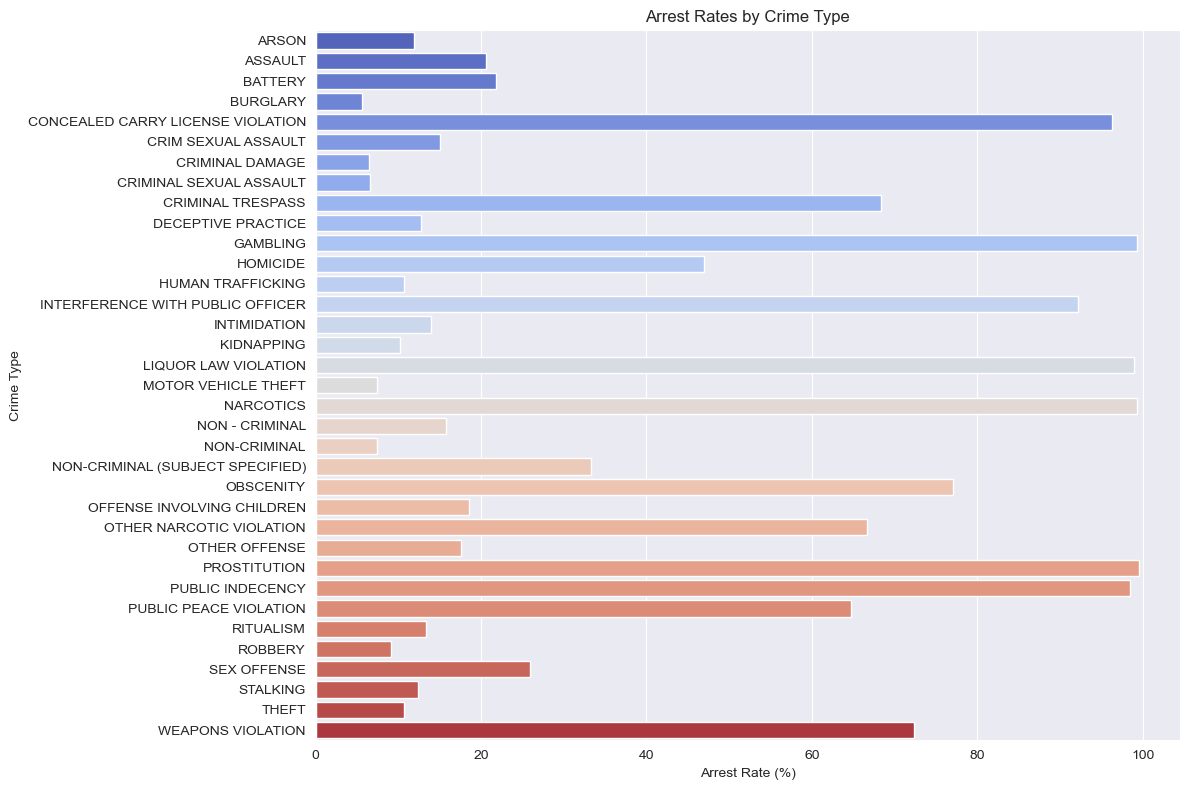

In [53]:
arrest_rates_crime_type = df.groupby('Primary Type')['Arrest'].mean() * 100  # percentage
plt.figure(figsize=(12, 8))
sns.barplot(x=arrest_rates_crime_type.values, y=arrest_rates_crime_type.index, palette='coolwarm')
plt.title('Arrest Rates by Crime Type')
plt.xlabel('Arrest Rate (%)')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()

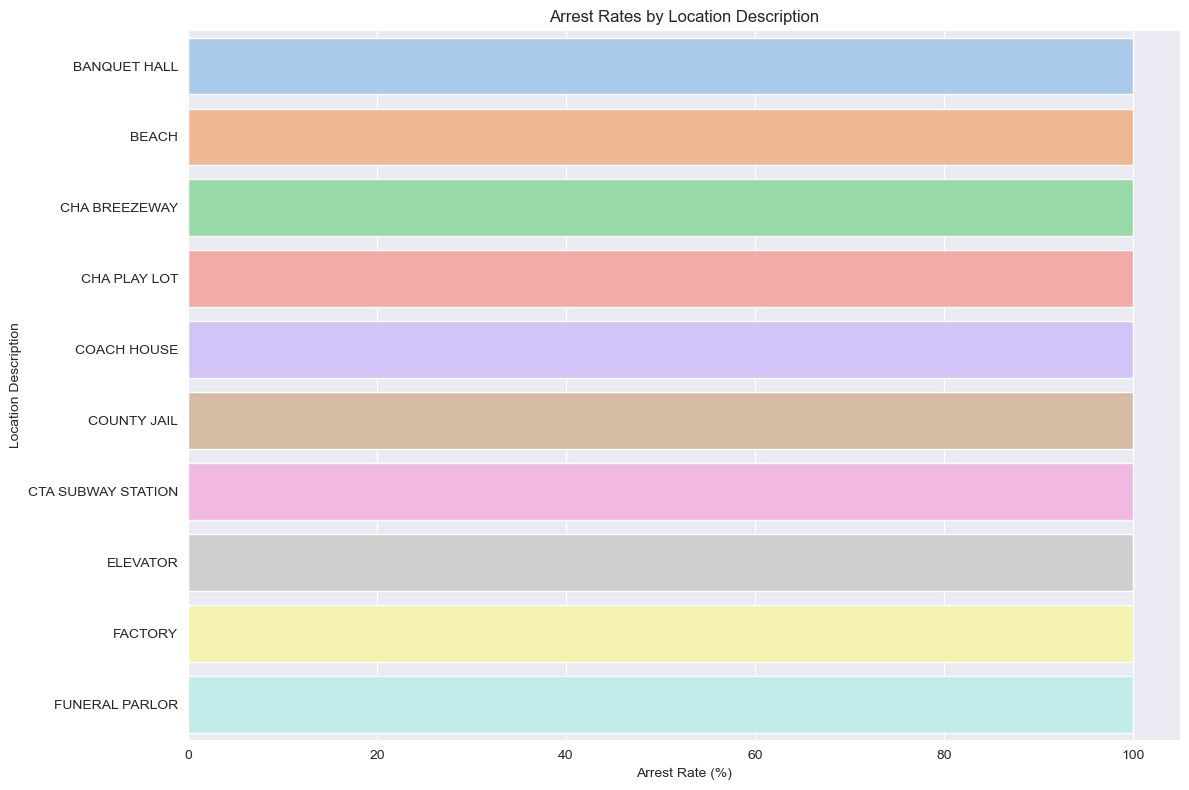

In [54]:
arrest_rates_location = df.groupby('Location Description')['Arrest'].mean().nlargest(10) * 100  # percentage, display top 10
plt.figure(figsize=(12, 8))
sns.barplot(x=arrest_rates_location.values, y=arrest_rates_location.index, palette='pastel')
plt.title('Arrest Rates by Location Description')
plt.xlabel('Arrest Rate (%)')
plt.ylabel('Location Description')
plt.tight_layout()
plt.show()

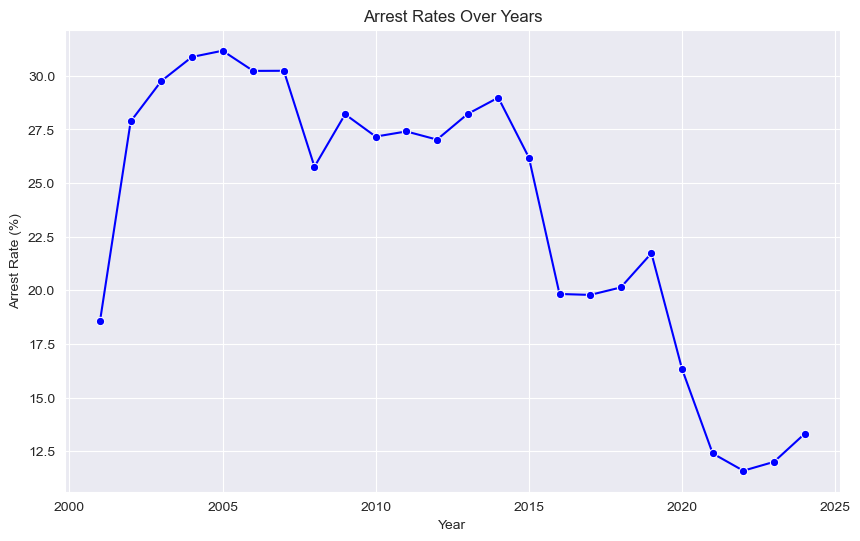

In [55]:
arrest_rates_year = df.groupby(df['Date'].dt.year)['Arrest'].mean() * 100  # percentage
plt.figure(figsize=(10, 6))
sns.lineplot(x=arrest_rates_year.index, y=arrest_rates_year.values, marker='o', linestyle='-', color='b')
plt.title('Arrest Rates Over Years')
plt.xlabel('Year')
plt.ylabel('Arrest Rate (%)')
plt.grid(True)
plt.show()

### 3.4.2 Domestic vs. Non-Domestic Crimes

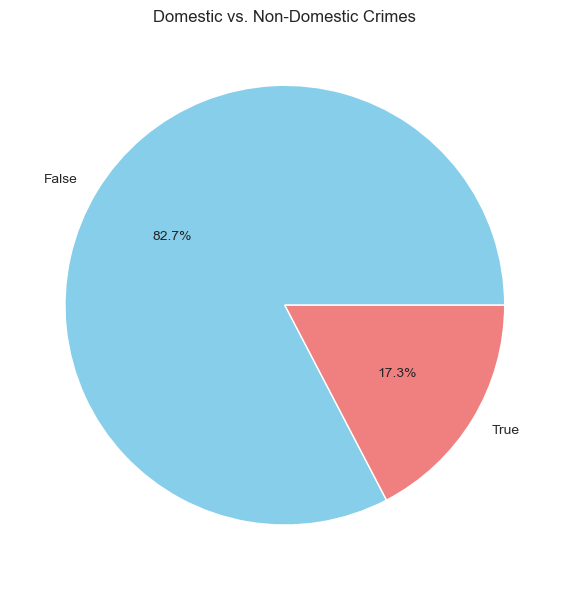

In [56]:
domestic_counts = df['Domestic'].value_counts()
plt.figure(figsize=(6, 6))
domestic_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Domestic vs. Non-Domestic Crimes')
plt.ylabel('')
plt.tight_layout()
plt.show()

## 3.5 Location-Specific Analysis

- Location Description Analysis: Investigate the most common locations for crimes
(e.g., streets, parking lots, apartments) and see how crime types vary by location.
- Comparison by Beat and Community Area: Analyze crime data by beat and
community area to identify localized crime patterns and hotspots.

### 3.5.1 Location Description Analysis

Most Common Locations for Crimes

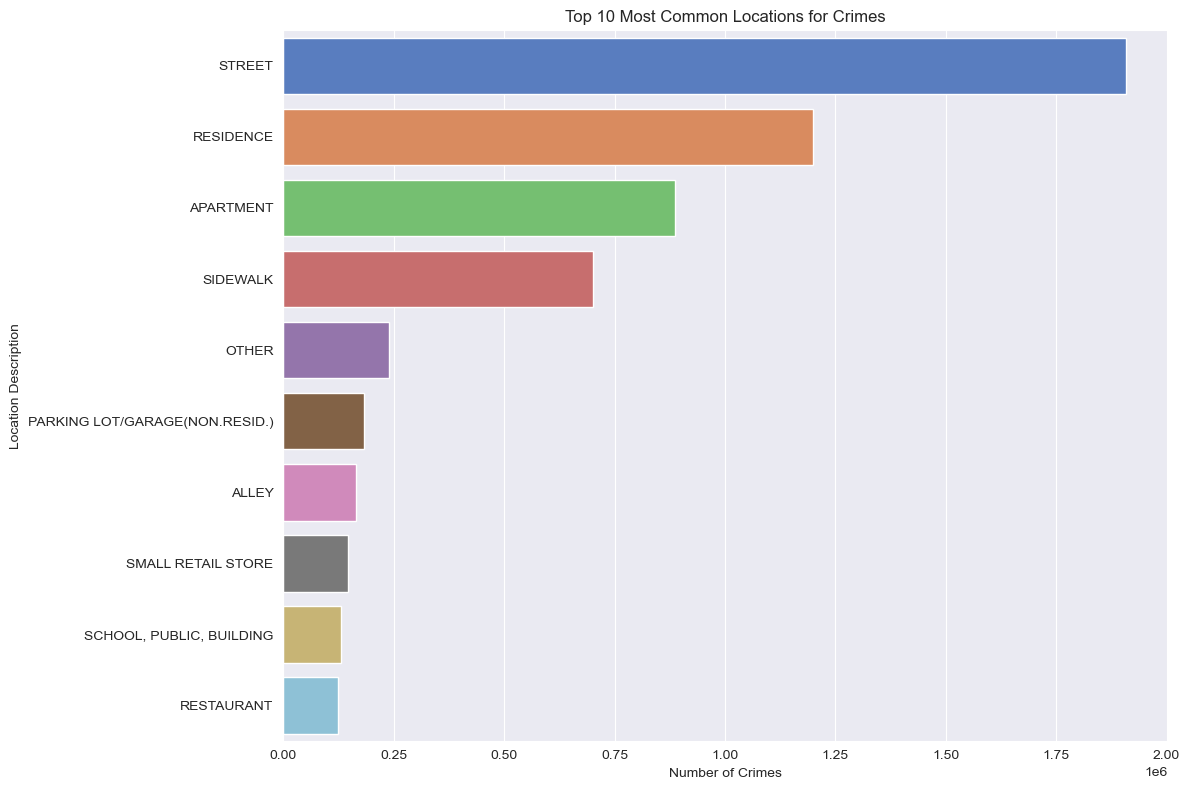

In [57]:
top_locations = df['Location Description'].value_counts().nlargest(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='muted')
plt.title('Top 10 Most Common Locations for Crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('Location Description')
plt.tight_layout()
plt.show()

Crime Types Variation by Location

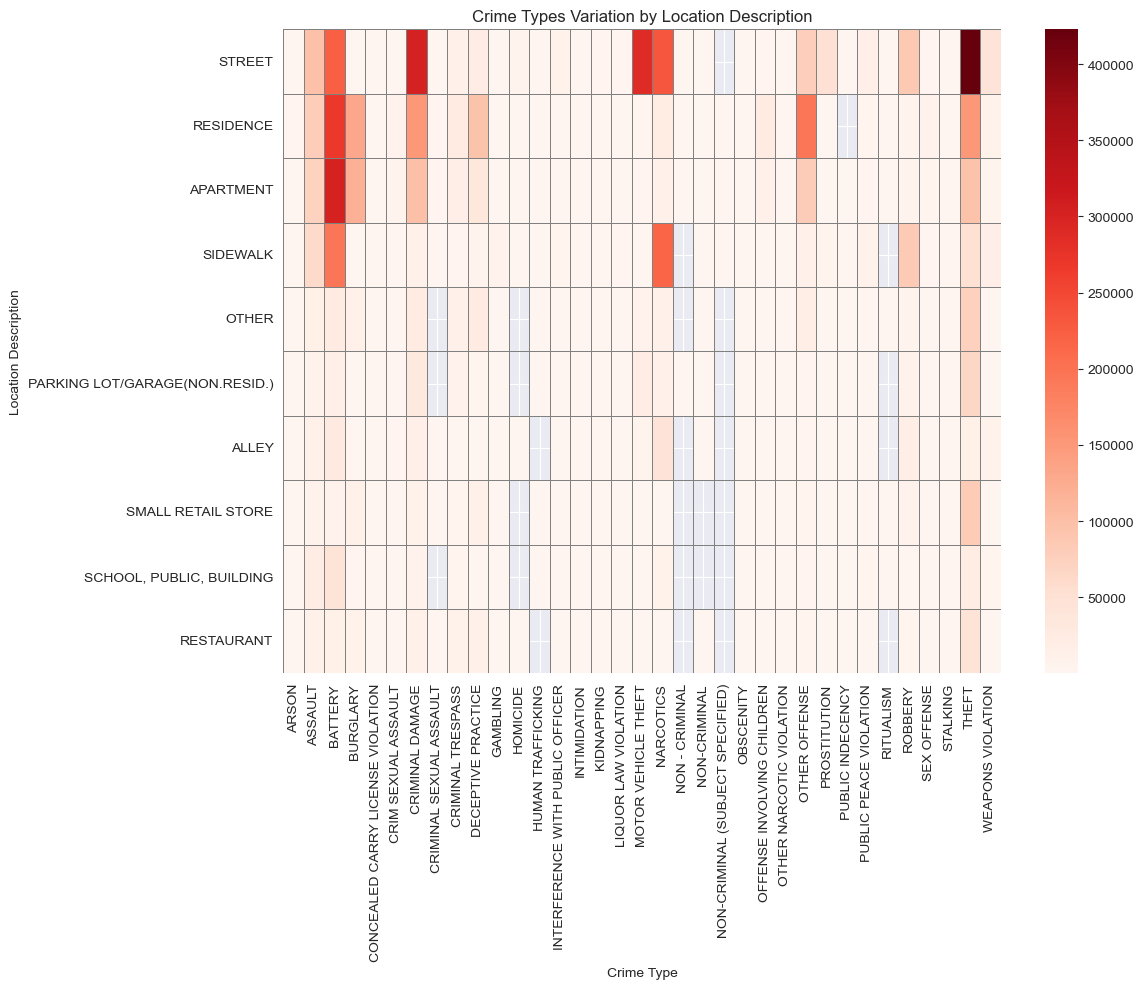

In [58]:
crime_types_by_location = df.groupby(['Location Description', 'Primary Type']).size().unstack()
plt.figure(figsize=(12, 10))
sns.heatmap(crime_types_by_location.loc[top_locations.index], cmap='Reds', linewidths=0.5, linecolor='gray')
plt.title('Crime Types Variation by Location Description')
plt.xlabel('Crime Type')
plt.ylabel('Location Description')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 3.5.2 Comparison by Beat and Community Area

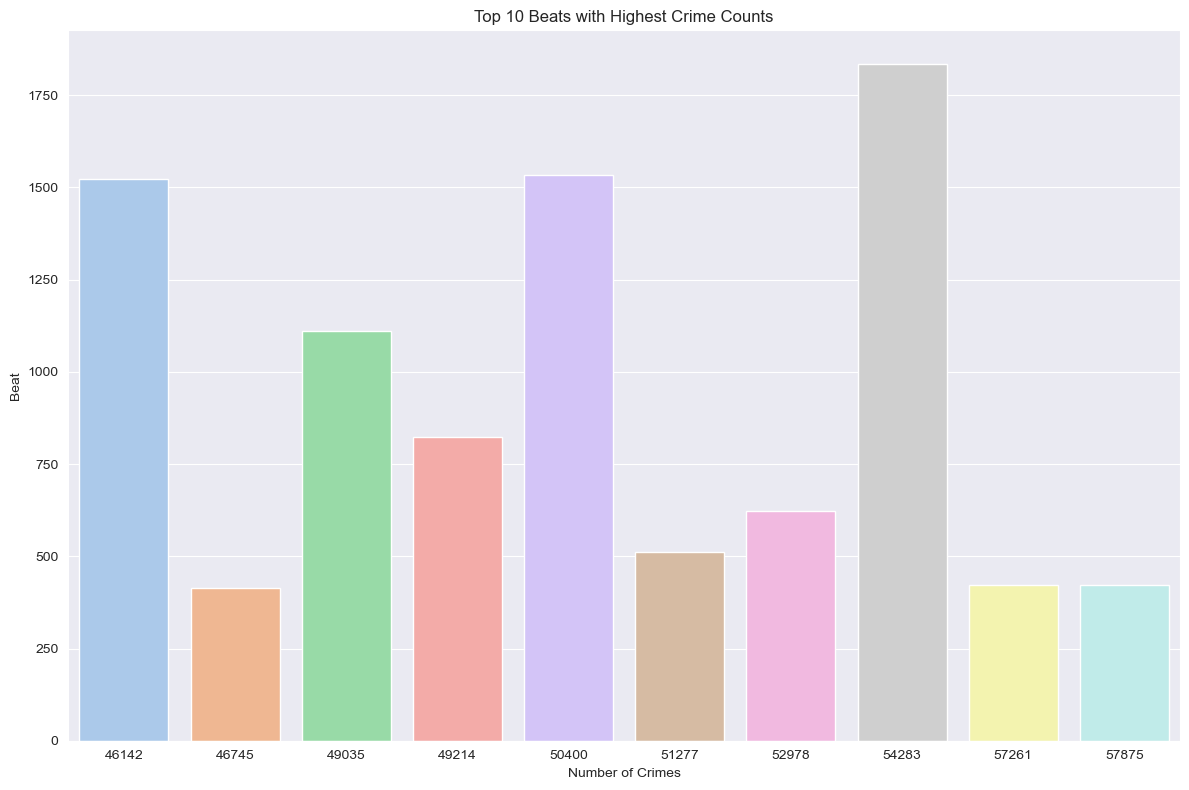

In [59]:
crime_counts_by_beat = df['Beat'].value_counts().nlargest(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=crime_counts_by_beat.values, y=crime_counts_by_beat.index, palette='pastel')
plt.title('Top 10 Beats with Highest Crime Counts')
plt.xlabel('Number of Crimes')
plt.ylabel('Beat')
plt.tight_layout()
plt.show()

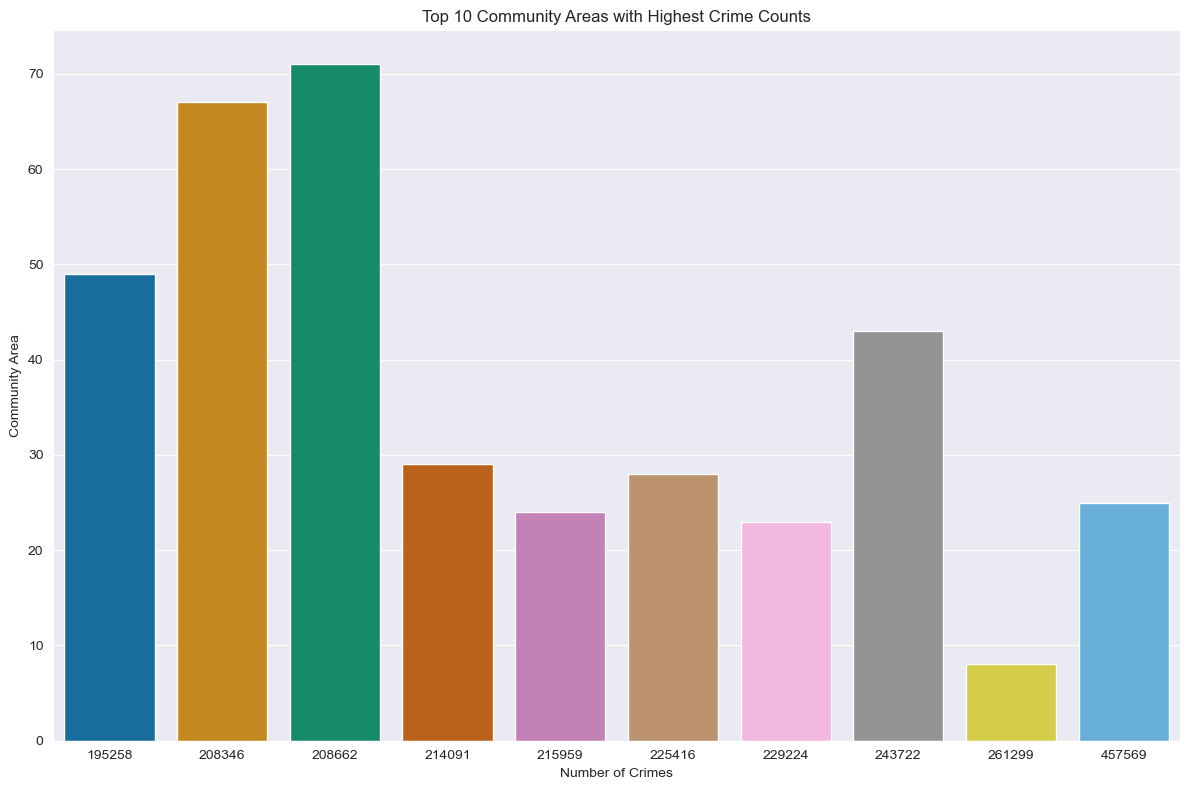

In [60]:
crime_counts_by_community = df['Community Area'].value_counts().nlargest(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=crime_counts_by_community.values, y=crime_counts_by_community.index, palette='colorblind')
plt.title('Top 10 Community Areas with Highest Crime Counts')
plt.xlabel('Number of Crimes')
plt.ylabel('Community Area')
plt.tight_layout()
plt.show()

## 3.6 Seasonal and Weather Impact

### 3.6.1 Seasonal Trends

In [61]:
df_copy=df.copy()
df_copy['Date'] = pd.to_datetime(df_copy['Date'])
df_copy['Month'] = df_copy['Date'].dt.month
season_map = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
              6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall',
              11: 'Fall', 12: 'Winter'}
df_copy['Season'] = df_copy['Month'].map(season_map)

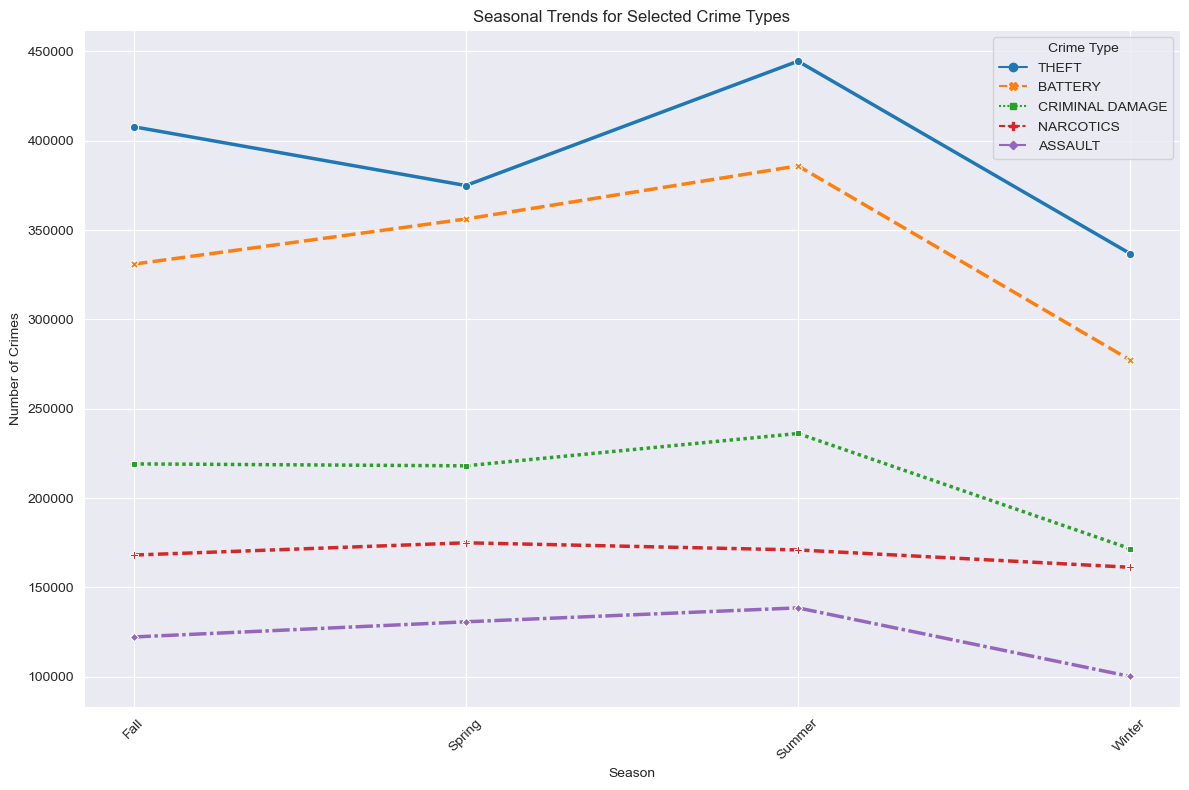

In [62]:
seasonal_crime_counts = df_copy.groupby(['Season', 'Primary Type']).size().unstack()
seasonal_crime_counts = seasonal_crime_counts[['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT']]
plt.figure(figsize=(12, 8))
sns.lineplot(data=seasonal_crime_counts, markers=True, linewidth=2.5)
plt.title('Seasonal Trends for Selected Crime Types')
plt.xlabel('Season')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Crime Type', loc='upper right')
plt.tight_layout()
plt.show()

## 3.7 Repeat Offenders and Recidivism

### 3.7.1 Repeat Crime Locations

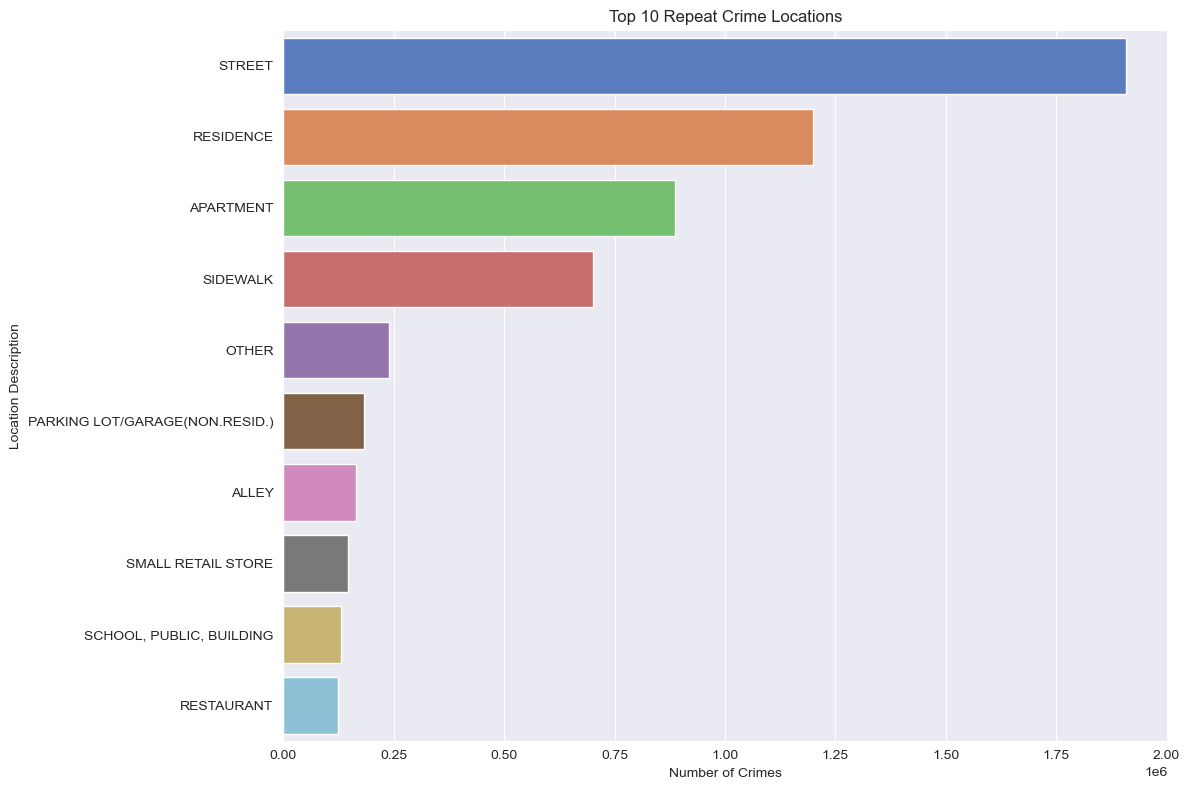

In [64]:
top_repeat_locations = df['Location Description'].value_counts().nlargest(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_repeat_locations.values, y=top_repeat_locations.index, palette='muted')
plt.title('Top 10 Repeat Crime Locations')
plt.xlabel('Number of Crimes')
plt.ylabel('Location Description')
plt.tight_layout()
plt.show()

### 3.7.2 Recidivism Rates

In [65]:
offender_counts = df_copy['ID'].value_counts()
recidivism_rate = (offender_counts > 1).mean() * 100  
print(f"Recidivism Rate: {recidivism_rate:.2f}%")

Recidivism Rate: 0.00%


# 4. Preparing the Data

In [1]:
import pandas as pd
df_sample=pd.read_excel("Sample Crime Dataset.xlsx")
df_sample

ID Case Number                Date                      Block  \
0     5741943.0    HN549294 2007-08-25 09:22:18         074XX N ROGERS AVE   
1       25953.0    JE240540 2021-05-24 15:06:00        020XX N LARAMIE AVE   
2       26038.0    JE279849 2021-06-26 09:24:00      062XX N MC CORMICK RD   
3    13279676.0    JG507211 2023-11-09 07:30:00           019XX W BYRON ST   
4    13274752.0    JG501049 2023-11-12 07:59:00  086XX S COTTAGE GROVE AVE   
..          ...         ...                 ...                        ...   
994  13203421.0    JG415540 2023-09-07 20:24:00         013XX S WABASH AVE   
995  13202672.0    JG414584 2023-09-07 00:01:00        071XX S LANGLEY AVE   
996  13204410.0    JG416803 2023-09-07 13:34:00            007XX W 72ND ST   
997  13204809.0    JG415669 2023-09-07 20:30:00        083XX S BRANDON AVE   
998  13208800.0    JG411427 2023-09-05 02:44:00   067XX S STONY ISLAND AVE   

       IUCR         Primary Type  \
0     560.0              ASSAULT   
1     110.0             HOMICIDE   
2     110.0             HOMICIDE   
3     620.0             BURGLARY   
4     454.0              BATTERY   
..      ...                  ...   
994   820.0                THEFT   
995   910.0  MOTOR VEHICLE THEFT   
996  1130.0   DECEPTIVE PRACTICE   
997   486.0              BATTERY   
998  1310.0      CRIMINAL DAMAGE   

                                           Description Location Description  \
0                                               SIMPLE                OTHER   
1                                  FIRST DEGREE MURDER               STREET   
2                                  FIRST DEGREE MURDER          PARKING LOT   
3                                       UNLAWFUL ENTRY            APARTMENT   
4    AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   SMALL RETAIL STORE   
..                                                 ...                  ...   
994                                     $500 AND UNDER                ALLEY   
995                                         AUTOMOBILE               STREET   
996                           FRAUD OR CONFIDENCE GAME            RESIDENCE   
997                            DOMESTIC BATTERY SIMPLE            APARTMENT   
998                                        TO PROPERTY           RESTAURANT   

     Arrest  Domestic  ...  Ward  Community Area  FBI Code  X Coordinate  \
0     False     False  ...  49.0             1.0       08A           NaN   
1      True     False  ...  36.0            19.0       01A     1141387.0   
2      True     False  ...  50.0            13.0       01A     1152781.0   
3     False     False  ...  47.0             5.0       5.0     1162518.0   
4      True     False  ...   6.0            44.0       08B     1183071.0   
..      ...       ...  ...   ...             ...       ...           ...   
994   False     False  ...   3.0            33.0       6.0     1176976.0   
995   False     False  ...   6.0            69.0       7.0     1182132.0   
996   False     False  ...   6.0            68.0      11.0     1172423.0   
997   False      True  ...  10.0            46.0       08B     1198930.0   
998   False     False  ...   5.0            43.0      14.0     1188026.0   

    Y Coordinate    Year          Updated On   Latitude  Longitude  \
0            NaN  2007.0 2015-08-17 15:03:40        NaN        NaN   
1      1913179.0  2021.0 2023-11-18 15:39:49  41.917838 -87.755969   
2      1941458.0  2021.0 2023-11-18 15:39:49  41.995219 -87.713355   
3      1925906.0  2023.0 2023-11-18 15:39:49  41.952345 -87.677975   
4      1847869.0  2023.0 2023-12-09 15:41:24  41.737751 -87.604856   
..           ...     ...                 ...        ...        ...   
994    1894313.0  2023.0 2023-09-15 15:42:23  41.865337 -87.625786   
995    1857805.0  2023.0 2023-09-15 15:42:23  41.765038 -87.607989   
996    1857127.0  2023.0 2023-09-15 15:42:23  41.763397 -87.643595   
997    1850326.0  2023.0 2023-09-15 15:42:23  41.744110 -87.546672   
998    1860

In [3]:
df_sample['Month'] = df_sample['Date'].dt.month
df_sample['DayOfWeek'] = df_sample['Date'].dt.dayofweek
df_sample['Hour'] = df_sample['Date'].dt.hour
df_sample['Year'] = df_sample['Date'].dt.hour

## 4.1 Building and Training a Predictive Model

In [4]:
features = ['Location Description', 'Month', 'DayOfWeek', 'Hour', 'Primary Type', 'District', 'Ward', 'Location', 'Year']
X = df_sample[features]
y = df_sample['Arrest']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

In [5]:
print(X_train_encoded.shape)

(799, 838)


In [6]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.83      1.00      0.91       164
        True       1.00      0.06      0.11        36

    accuracy                           0.83       200
   macro avg       0.91      0.53      0.51       200
weighted avg       0.86      0.83      0.76       200

[[164   0]
 [ 34   2]]


## 4.2 Visualizing Risk Assessment

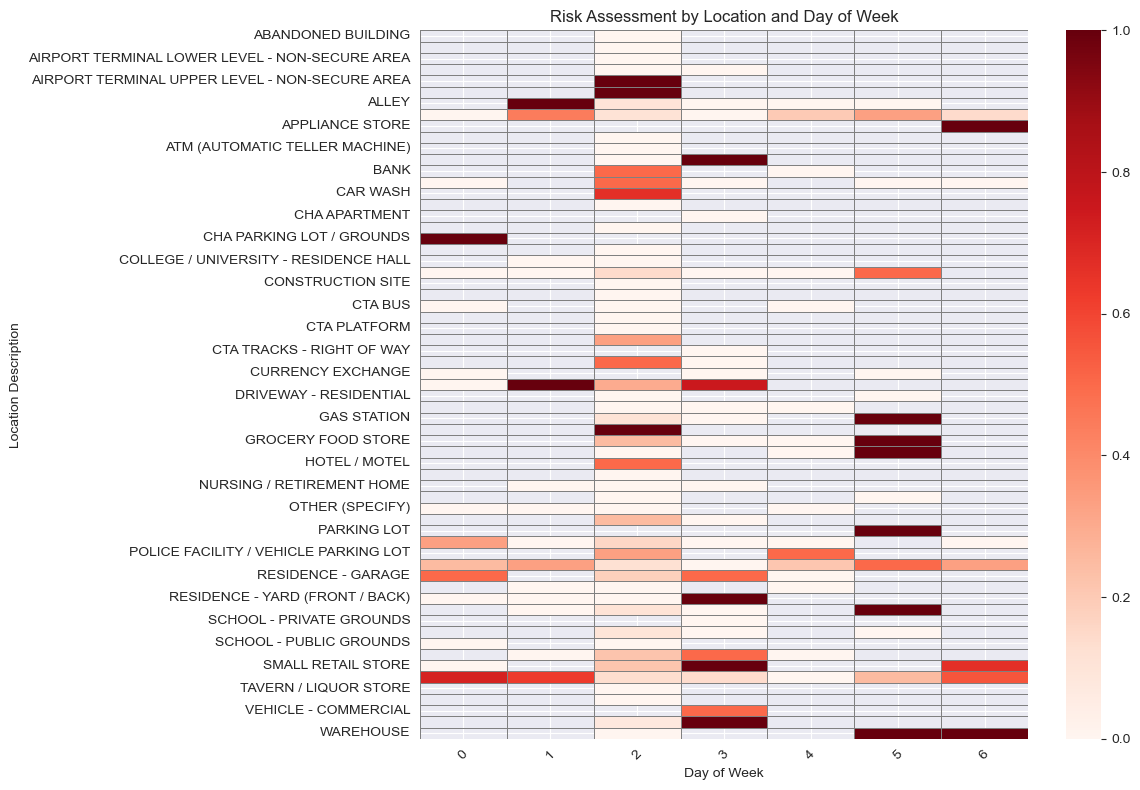

In [7]:
risk_by_location_day = df_sample.groupby(['Location Description', 'DayOfWeek'])['Arrest'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(risk_by_location_day, cmap='Reds', linewidths=0.5, linecolor='gray')
plt.title('Risk Assessment by Location and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Location Description')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()